In [1]:
import keras
import random, os
from keras.layers import Activation, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import Image
import PIL

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 6
epochs = 1000
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [3]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [4]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = PIL.Image.open(path + file)
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [5]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 1800 samples, validate on 1200 samples
Epoch 1/1000
1800/1800 [==============================] - 2s 942us/step - loss: 1.7926 - acc: 0.1506 - val_loss: 1.7931 - val_acc: 0.1667
Epoch 2/1000
1800/1800 [==============================] - 0s 55us/step - loss: 1.7933 - acc: 0.1583 - val_loss: 1.7916 - val_acc: 0.1708
Epoch 3/1000
1800/1800 [==============================] - 0s 63us/step - loss: 1.7910 - acc: 0.1756 - val_loss: 1.7921 - val_acc: 0.1667
Epoch 4/1000
1800/1800 [==============================] - 0s 91us/step - loss: 1.7923 - acc: 0.1667 - val_loss: 1.7926 - val_acc: 0.1667
Epoch 5/1000
1800/1800 [==============================] - 0s 76us/step - loss: 1.7920 - acc: 0.1678 - val_loss: 1.7920 - val_acc: 0.1667
Epoch 6/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.7908 - acc: 0.1728 - val_loss: 1.7919 - val_acc: 0.1667
Epoch 7/1000
1800/1800 [==============================] - 0s 83us/step - loss: 1.7889 - acc: 0.1906 - val_loss: 1.7882 - val_acc:

1800/1800 [==============================] - 0s 64us/step - loss: 0.2234 - acc: 0.9333 - val_loss: 0.2699 - val_acc: 0.8992
Epoch 61/1000
1800/1800 [==============================] - 0s 69us/step - loss: 0.1651 - acc: 0.9439 - val_loss: 0.6191 - val_acc: 0.8342
Epoch 62/1000
1800/1800 [==============================] - 0s 75us/step - loss: 0.1735 - acc: 0.9483 - val_loss: 0.5455 - val_acc: 0.8133
Epoch 63/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.1940 - acc: 0.9372 - val_loss: 0.1910 - val_acc: 0.9325
Epoch 64/1000
1800/1800 [==============================] - 0s 90us/step - loss: 0.1364 - acc: 0.9561 - val_loss: 1.0927 - val_acc: 0.7725
Epoch 65/1000
1800/1800 [==============================] - 0s 84us/step - loss: 0.2977 - acc: 0.9222 - val_loss: 0.7782 - val_acc: 0.7925
Epoch 66/1000
1800/1800 [==============================] - 0s 85us/step - loss: 0.2162 - acc: 0.9511 - val_loss: 0.1974 - val_acc: 0.9267
Epoch 67/1000
1800/1800 [=======================

1800/1800 [==============================] - 0s 61us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0902 - val_acc: 0.9742
Epoch 120/1000
1800/1800 [==============================] - 0s 64us/step - loss: 0.0045 - acc: 0.9994 - val_loss: 0.0852 - val_acc: 0.9767
Epoch 121/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.0042 - acc: 0.9994 - val_loss: 0.0989 - val_acc: 0.9733
Epoch 122/1000
1800/1800 [==============================] - 0s 82us/step - loss: 0.0048 - acc: 0.9994 - val_loss: 0.1281 - val_acc: 0.9708
Epoch 123/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.1579 - val_acc: 0.9617
Epoch 124/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.2167 - acc: 0.9411 - val_loss: 3.3390 - val_acc: 0.5592
Epoch 125/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.6632 - acc: 0.8733 - val_loss: 0.1216 - val_acc: 0.9642
Epoch 126/1000
1800/1800 [================

1800/1800 [==============================] - 0s 65us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0859 - val_acc: 0.9775
Epoch 178/1000
1800/1800 [==============================] - 0s 73us/step - loss: 8.9844e-04 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9775
Epoch 179/1000
1800/1800 [==============================] - 0s 98us/step - loss: 8.4516e-04 - acc: 1.0000 - val_loss: 0.0894 - val_acc: 0.9775
Epoch 180/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0893 - val_acc: 0.9775
Epoch 181/1000
1800/1800 [==============================] - 0s 81us/step - loss: 7.3620e-04 - acc: 1.0000 - val_loss: 0.0880 - val_acc: 0.9783
Epoch 182/1000
1800/1800 [==============================] - 0s 77us/step - loss: 9.9946e-04 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9800
Epoch 183/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0961 - val_acc: 0.9808
Epoch 184/1000
1800/1800 [

Epoch 235/1000
1800/1800 [==============================] - 0s 77us/step - loss: 7.0791e-04 - acc: 1.0000 - val_loss: 0.0901 - val_acc: 0.9792
Epoch 236/1000
1800/1800 [==============================] - 0s 98us/step - loss: 8.1783e-04 - acc: 1.0000 - val_loss: 0.1046 - val_acc: 0.9775
Epoch 237/1000
1800/1800 [==============================] - 0s 97us/step - loss: 8.0922e-04 - acc: 1.0000 - val_loss: 0.0954 - val_acc: 0.9783
Epoch 238/1000
1800/1800 [==============================] - 0s 97us/step - loss: 5.3281e-04 - acc: 1.0000 - val_loss: 0.0965 - val_acc: 0.9783
Epoch 239/1000
1800/1800 [==============================] - 0s 96us/step - loss: 5.2230e-04 - acc: 1.0000 - val_loss: 0.0965 - val_acc: 0.9792
Epoch 240/1000
1800/1800 [==============================] - 0s 86us/step - loss: 3.9925e-04 - acc: 1.0000 - val_loss: 0.0995 - val_acc: 0.9792
Epoch 241/1000
1800/1800 [==============================] - 0s 69us/step - loss: 2.8187e-04 - acc: 1.0000 - val_loss: 0.1043 - val_acc: 0.9775

1800/1800 [==============================] - 0s 67us/step - loss: 9.0247e-05 - acc: 1.0000 - val_loss: 0.1193 - val_acc: 0.9758
Epoch 293/1000
1800/1800 [==============================] - 0s 79us/step - loss: 6.2032e-05 - acc: 1.0000 - val_loss: 0.1210 - val_acc: 0.9758
Epoch 294/1000
1800/1800 [==============================] - 0s 86us/step - loss: 5.2084e-05 - acc: 1.0000 - val_loss: 0.1188 - val_acc: 0.9775
Epoch 295/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.3154e-04 - acc: 1.0000 - val_loss: 0.5111 - val_acc: 0.9075
Epoch 296/1000
1800/1800 [==============================] - 0s 52us/step - loss: 0.0751 - acc: 0.9856 - val_loss: 0.1005 - val_acc: 0.9750
Epoch 297/1000
1800/1800 [==============================] - 0s 70us/step - loss: 6.9934e-04 - acc: 1.0000 - val_loss: 0.0931 - val_acc: 0.9758
Epoch 298/1000
1800/1800 [==============================] - 0s 51us/step - loss: 4.9514e-04 - acc: 1.0000 - val_loss: 0.0892 - val_acc: 0.9808
Epoch 299/1000
180

1800/1800 [==============================] - 0s 65us/step - loss: 3.2161e-04 - acc: 1.0000 - val_loss: 0.1418 - val_acc: 0.9767
Epoch 350/1000
1800/1800 [==============================] - 0s 100us/step - loss: 7.0063e-05 - acc: 1.0000 - val_loss: 0.1293 - val_acc: 0.9783
Epoch 351/1000
1800/1800 [==============================] - 0s 98us/step - loss: 5.4973e-04 - acc: 1.0000 - val_loss: 0.1207 - val_acc: 0.9800
Epoch 352/1000
1800/1800 [==============================] - 0s 97us/step - loss: 5.8527e-05 - acc: 1.0000 - val_loss: 0.1156 - val_acc: 0.9800
Epoch 353/1000
1800/1800 [==============================] - 0s 95us/step - loss: 4.5024e-05 - acc: 1.0000 - val_loss: 0.1193 - val_acc: 0.9800
Epoch 354/1000
1800/1800 [==============================] - 0s 98us/step - loss: 4.1523e-05 - acc: 1.0000 - val_loss: 0.1169 - val_acc: 0.9800
Epoch 355/1000
1800/1800 [==============================] - 0s 96us/step - loss: 9.6368e-04 - acc: 0.9994 - val_loss: 0.1157 - val_acc: 0.9783
Epoch 356/100

1800/1800 [==============================] - 0s 78us/step - loss: 1.2680e-05 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9767
Epoch 407/1000
1800/1800 [==============================] - 0s 94us/step - loss: 1.5318e-05 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9775
Epoch 408/1000
1800/1800 [==============================] - 0s 77us/step - loss: 2.5406e-05 - acc: 1.0000 - val_loss: 0.1308 - val_acc: 0.9767
Epoch 409/1000
1800/1800 [==============================] - 0s 72us/step - loss: 2.3314e-05 - acc: 1.0000 - val_loss: 0.1310 - val_acc: 0.9783
Epoch 410/1000
1800/1800 [==============================] - 0s 89us/step - loss: 1.3884e-05 - acc: 1.0000 - val_loss: 0.1279 - val_acc: 0.9783
Epoch 411/1000
1800/1800 [==============================] - 0s 87us/step - loss: 1.5072e-05 - acc: 1.0000 - val_loss: 0.1284 - val_acc: 0.9783
Epoch 412/1000
1800/1800 [==============================] - 0s 96us/step - loss: 1.2449e-05 - acc: 1.0000 - val_loss: 0.1243 - val_acc: 0.9783
Epoch 413/1000

1800/1800 [==============================] - 0s 64us/step - loss: 3.0745e-04 - acc: 1.0000 - val_loss: 0.1590 - val_acc: 0.9758
Epoch 464/1000
1800/1800 [==============================] - 0s 60us/step - loss: 2.6252e-05 - acc: 1.0000 - val_loss: 0.1564 - val_acc: 0.9767
Epoch 465/1000
1800/1800 [==============================] - 0s 59us/step - loss: 1.6704e-05 - acc: 1.0000 - val_loss: 0.1528 - val_acc: 0.9783
Epoch 466/1000
1800/1800 [==============================] - 0s 95us/step - loss: 4.3525e-05 - acc: 1.0000 - val_loss: 0.1524 - val_acc: 0.9767
Epoch 467/1000
1800/1800 [==============================] - 0s 93us/step - loss: 2.4908e-05 - acc: 1.0000 - val_loss: 0.1450 - val_acc: 0.9783
Epoch 468/1000
1800/1800 [==============================] - 0s 80us/step - loss: 3.7121e-05 - acc: 1.0000 - val_loss: 0.1429 - val_acc: 0.9775
Epoch 469/1000
1800/1800 [==============================] - 0s 98us/step - loss: 1.8819e-05 - acc: 1.0000 - val_loss: 0.1364 - val_acc: 0.9800
Epoch 470/1000

1800/1800 [==============================] - 0s 68us/step - loss: 1.6791e-05 - acc: 1.0000 - val_loss: 0.1247 - val_acc: 0.9783
Epoch 521/1000
1800/1800 [==============================] - 0s 88us/step - loss: 9.3246e-06 - acc: 1.0000 - val_loss: 0.1253 - val_acc: 0.9783
Epoch 522/1000
1800/1800 [==============================] - 0s 96us/step - loss: 3.1085e-05 - acc: 1.0000 - val_loss: 0.1286 - val_acc: 0.9775
Epoch 523/1000
1800/1800 [==============================] - 0s 96us/step - loss: 1.3958e-05 - acc: 1.0000 - val_loss: 0.1270 - val_acc: 0.9775
Epoch 524/1000
1800/1800 [==============================] - 0s 98us/step - loss: 6.5840e-06 - acc: 1.0000 - val_loss: 0.1267 - val_acc: 0.9775
Epoch 525/1000
1800/1800 [==============================] - 0s 97us/step - loss: 1.2632e-05 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9775
Epoch 526/1000
1800/1800 [==============================] - 0s 99us/step - loss: 2.1982e-05 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9775
Epoch 527/1000

1800/1800 [==============================] - 0s 66us/step - loss: 1.7943e-05 - acc: 1.0000 - val_loss: 0.1476 - val_acc: 0.9775
Epoch 578/1000
1800/1800 [==============================] - 0s 98us/step - loss: 5.9511e-06 - acc: 1.0000 - val_loss: 0.1470 - val_acc: 0.9775
Epoch 579/1000
1800/1800 [==============================] - 0s 97us/step - loss: 7.4946e-06 - acc: 1.0000 - val_loss: 0.1442 - val_acc: 0.9775
Epoch 580/1000
1800/1800 [==============================] - 0s 89us/step - loss: 9.2556e-06 - acc: 1.0000 - val_loss: 0.1432 - val_acc: 0.9775
Epoch 581/1000
1800/1800 [==============================] - 0s 77us/step - loss: 1.0978e-05 - acc: 1.0000 - val_loss: 0.1446 - val_acc: 0.9775
Epoch 582/1000
1800/1800 [==============================] - 0s 99us/step - loss: 9.8180e-06 - acc: 1.0000 - val_loss: 0.1429 - val_acc: 0.9775
Epoch 583/1000
1800/1800 [==============================] - 0s 96us/step - loss: 6.1911e-06 - acc: 1.0000 - val_loss: 0.1422 - val_acc: 0.9775
Epoch 584/1000

1800/1800 [==============================] - 0s 71us/step - loss: 5.3283e-06 - acc: 1.0000 - val_loss: 0.1387 - val_acc: 0.9792
Epoch 635/1000
1800/1800 [==============================] - 0s 98us/step - loss: 7.4862e-06 - acc: 1.0000 - val_loss: 0.1389 - val_acc: 0.9792
Epoch 636/1000
1800/1800 [==============================] - 0s 97us/step - loss: 7.9978e-06 - acc: 1.0000 - val_loss: 0.1390 - val_acc: 0.9792
Epoch 637/1000
1800/1800 [==============================] - 0s 98us/step - loss: 9.2331e-06 - acc: 1.0000 - val_loss: 0.1377 - val_acc: 0.9792
Epoch 638/1000
1800/1800 [==============================] - 0s 96us/step - loss: 8.1714e-06 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9792
Epoch 639/1000
1800/1800 [==============================] - 0s 97us/step - loss: 1.6813e-05 - acc: 1.0000 - val_loss: 0.1375 - val_acc: 0.9800
Epoch 640/1000
1800/1800 [==============================] - 0s 88us/step - loss: 2.3514e-05 - acc: 1.0000 - val_loss: 0.1336 - val_acc: 0.9808
Epoch 641/1000

1800/1800 [==============================] - 0s 66us/step - loss: 1.2725e-05 - acc: 1.0000 - val_loss: 0.1546 - val_acc: 0.9775
Epoch 692/1000
1800/1800 [==============================] - 0s 76us/step - loss: 4.6260e-06 - acc: 1.0000 - val_loss: 0.1543 - val_acc: 0.9775
Epoch 693/1000
1800/1800 [==============================] - 0s 100us/step - loss: 4.6052e-06 - acc: 1.0000 - val_loss: 0.1548 - val_acc: 0.9767
Epoch 694/1000
1800/1800 [==============================] - 0s 93us/step - loss: 8.0895e-06 - acc: 1.0000 - val_loss: 0.1521 - val_acc: 0.9783
Epoch 695/1000
1800/1800 [==============================] - 0s 97us/step - loss: 9.5435e-06 - acc: 1.0000 - val_loss: 0.1500 - val_acc: 0.9783
Epoch 696/1000
1800/1800 [==============================] - 0s 95us/step - loss: 5.9125e-06 - acc: 1.0000 - val_loss: 0.1490 - val_acc: 0.9783
Epoch 697/1000
1800/1800 [==============================] - 0s 97us/step - loss: 2.2623e-05 - acc: 1.0000 - val_loss: 0.1489 - val_acc: 0.9775
Epoch 698/100

1800/1800 [==============================] - 0s 66us/step - loss: 3.0803e-05 - acc: 1.0000 - val_loss: 0.1630 - val_acc: 0.9767
Epoch 749/1000
1800/1800 [==============================] - 0s 97us/step - loss: 5.8320e-06 - acc: 1.0000 - val_loss: 0.1626 - val_acc: 0.9767
Epoch 750/1000
1800/1800 [==============================] - 0s 99us/step - loss: 6.5326e-06 - acc: 1.0000 - val_loss: 0.1612 - val_acc: 0.9767
Epoch 751/1000
1800/1800 [==============================] - 0s 99us/step - loss: 5.5497e-06 - acc: 1.0000 - val_loss: 0.1596 - val_acc: 0.9767
Epoch 752/1000
1800/1800 [==============================] - 0s 98us/step - loss: 1.0393e-05 - acc: 1.0000 - val_loss: 0.1580 - val_acc: 0.9767
Epoch 753/1000
1800/1800 [==============================] - 0s 97us/step - loss: 1.0160e-05 - acc: 1.0000 - val_loss: 0.1596 - val_acc: 0.9758
Epoch 754/1000
1800/1800 [==============================] - 0s 95us/step - loss: 1.2061e-05 - acc: 1.0000 - val_loss: 0.1586 - val_acc: 0.9758
Epoch 755/1000

1800/1800 [==============================] - 0s 65us/step - loss: 2.5234e-06 - acc: 1.0000 - val_loss: 0.1588 - val_acc: 0.9758
Epoch 806/1000
1800/1800 [==============================] - 0s 68us/step - loss: 4.7207e-05 - acc: 1.0000 - val_loss: 0.1678 - val_acc: 0.9758
Epoch 807/1000
1800/1800 [==============================] - 0s 89us/step - loss: 4.7086e-06 - acc: 1.0000 - val_loss: 0.1669 - val_acc: 0.9758
Epoch 808/1000
1800/1800 [==============================] - 0s 85us/step - loss: 4.0266e-06 - acc: 1.0000 - val_loss: 0.1659 - val_acc: 0.9758
Epoch 809/1000
1800/1800 [==============================] - 0s 88us/step - loss: 5.8261e-06 - acc: 1.0000 - val_loss: 0.1630 - val_acc: 0.9758
Epoch 810/1000
1800/1800 [==============================] - 0s 82us/step - loss: 6.3577e-05 - acc: 1.0000 - val_loss: 0.1472 - val_acc: 0.9783
Epoch 811/1000
1800/1800 [==============================] - 0s 88us/step - loss: 5.6193e-06 - acc: 1.0000 - val_loss: 0.1462 - val_acc: 0.9792
Epoch 812/1000

1800/1800 [==============================] - 0s 65us/step - loss: 1.7503e-05 - acc: 1.0000 - val_loss: 0.1646 - val_acc: 0.9783
Epoch 863/1000
1800/1800 [==============================] - 0s 69us/step - loss: 5.5415e-06 - acc: 1.0000 - val_loss: 0.1621 - val_acc: 0.9783
Epoch 864/1000
1800/1800 [==============================] - 0s 98us/step - loss: 3.2487e-06 - acc: 1.0000 - val_loss: 0.1619 - val_acc: 0.9783
Epoch 865/1000
1800/1800 [==============================] - 0s 97us/step - loss: 3.0363e-06 - acc: 1.0000 - val_loss: 0.1621 - val_acc: 0.9783
Epoch 866/1000
1800/1800 [==============================] - 0s 81us/step - loss: 3.0653e-06 - acc: 1.0000 - val_loss: 0.1621 - val_acc: 0.9783
Epoch 867/1000
1800/1800 [==============================] - 0s 100us/step - loss: 5.0261e-06 - acc: 1.0000 - val_loss: 0.1615 - val_acc: 0.9783
Epoch 868/1000
1800/1800 [==============================] - 0s 95us/step - loss: 2.7930e-06 - acc: 1.0000 - val_loss: 0.1628 - val_acc: 0.9783
Epoch 869/100

1800/1800 [==============================] - 0s 70us/step - loss: 6.2178e-06 - acc: 1.0000 - val_loss: 0.1665 - val_acc: 0.9775
Epoch 920/1000
1800/1800 [==============================] - 0s 85us/step - loss: 1.8551e-06 - acc: 1.0000 - val_loss: 0.1663 - val_acc: 0.9775
Epoch 921/1000
1800/1800 [==============================] - 0s 78us/step - loss: 5.0552e-06 - acc: 1.0000 - val_loss: 0.1705 - val_acc: 0.9767
Epoch 922/1000
1800/1800 [==============================] - 0s 97us/step - loss: 6.3316e-05 - acc: 1.0000 - val_loss: 0.1774 - val_acc: 0.9758
Epoch 923/1000
1800/1800 [==============================] - 0s 98us/step - loss: 1.9690e-06 - acc: 1.0000 - val_loss: 0.1769 - val_acc: 0.9758
Epoch 924/1000
1800/1800 [==============================] - 0s 96us/step - loss: 1.1623e-05 - acc: 1.0000 - val_loss: 0.1957 - val_acc: 0.9758
Epoch 925/1000
1800/1800 [==============================] - 0s 89us/step - loss: 2.3668e-05 - acc: 1.0000 - val_loss: 0.2022 - val_acc: 0.9758
Epoch 926/1000

1800/1800 [==============================] - 0s 77us/step - loss: 2.1353e-06 - acc: 1.0000 - val_loss: 0.1668 - val_acc: 0.9775
Epoch 977/1000
1800/1800 [==============================] - 0s 73us/step - loss: 3.3231e-06 - acc: 1.0000 - val_loss: 0.1664 - val_acc: 0.9783
Epoch 978/1000
1800/1800 [==============================] - 0s 84us/step - loss: 1.6298e-06 - acc: 1.0000 - val_loss: 0.1663 - val_acc: 0.9783
Epoch 979/1000
1800/1800 [==============================] - 0s 82us/step - loss: 3.1465e-06 - acc: 1.0000 - val_loss: 0.1667 - val_acc: 0.9783
Epoch 980/1000
1800/1800 [==============================] - 0s 95us/step - loss: 1.5444e-06 - acc: 1.0000 - val_loss: 0.1665 - val_acc: 0.9783
Epoch 981/1000
1800/1800 [==============================] - 0s 96us/step - loss: 5.4132e-06 - acc: 1.0000 - val_loss: 0.1666 - val_acc: 0.9775
Epoch 982/1000
1800/1800 [==============================] - 0s 97us/step - loss: 1.1180e-06 - acc: 1.0000 - val_loss: 0.1662 - val_acc: 0.9783
Epoch 983/1000

In [10]:
def write_output(filename, shape, size):
    result = []
    for i in range(len(shape)):
        tc = shape[i].reshape(1, img_rows, img_cols, 1)
        output = get_layer_output([tc])
        output = np.array(output).reshape(size)
        result.append(output)
    np.save(filename, result)

In [11]:
circle = []
circle_filename = []
square = []
square_filename = []
triangle = []
triangle_filename = []
horizontal = []
horizontal_filename = []
vertical = []
vertical_filename = []
diagonal = []
diagonal_filename = []

In [12]:
for i in range(len(y_test1)):
    if y_test1[i] == 0:
        circle.append(x_test[i])
        circle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 1:
        square.append(x_test[i])
        square_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 2:
        triangle.append(x_test[i])
        triangle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 3:
        horizontal.append(x_test[i])
        horizontal_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 4:
        vertical.append(x_test[i])
        vertical_filename.append(test_labels_with_num[i])
    else:
        diagonal.append(x_test[i])
        diagonal_filename.append(test_labels_with_num[i])

In [13]:
get_layer_output = K.function([model.layers[0].input], [model.layers[15].output])

In [14]:
output_size = 64
write_output("./2nd_result/circle_output", circle, output_size)
write_output("./2nd_result/square_output", square, output_size)
write_output("./2nd_result/triangle_output", triangle, output_size)
write_output("./2nd_result/horizontal_output", horizontal, output_size)
write_output("./2nd_result/vertical_output", vertical, output_size)
write_output("./2nd_result/diagonal_output", diagonal, output_size)

In [15]:
total_filename = circle_filename+ square_filename + triangle_filename + horizontal_filename + vertical_filename+diagonal_filename

In [16]:
def getMaxMin(shape):
    mmax = -1000
    mmin = 1000
    for i in range(len(shape)):
        max = -1000
        min = 1000
        for j in range(len(shape[i])):
            if max < shape[i][j]:
                max = shape[i][j]
            if min > shape[i][j]:
                min = shape[i][j]
        if mmax < max:
            mmax = max
        if mmin > min:
            mmin = min
    return mmax, mmin

In [17]:
circle = np.load("./2nd_result/circle_output.npy")
square = np.load("./2nd_result/square_output.npy")
triangle = np.load("./2nd_result/triangle_output.npy")
horizontal = np.load("./2nd_result/horizontal_output.npy")
vertical = np.load("./2nd_result/vertical_output.npy")
diagonal = np.load("./2nd_result/diagonal_output.npy")

In [18]:
print("circle",getMaxMin(circle))
print("square",getMaxMin(square))
print("triangle",getMaxMin(triangle))
print("horizontal",getMaxMin(horizontal))
print("vertical",getMaxMin(vertical))
print("diagonal",getMaxMin(diagonal))

circle (17.777246, 0.0)
square (23.650578, 0.0)
triangle (16.439672, 0.0)
horizontal (15.085647, 0.0)
vertical (24.687958, 0.0)
diagonal (27.487888, 0.0)


In [19]:
rand_index = random.randint(0, 100)
one = np.vstack([circle, square])
two = np.vstack([triangle, horizontal])
thr = np.vstack([vertical, diagonal])
total = np.vstack([one, two])
total = np.vstack([total, thr])

In [20]:
circle_dist = []
square_dist = []
triangle_dist = []
hor_dist = []
ver_dist = []
dia_dist = []

for line in total:
    circle_dist.append(distance.euclidean(circle[rand_index], line))
    square_dist.append(distance.euclidean(square[rand_index], line))
    triangle_dist.append(distance.euclidean(triangle[rand_index], line))
    hor_dist.append(distance.euclidean(horizontal[rand_index], line))
    ver_dist.append(distance.euclidean(vertical[rand_index], line))
    dia_dist.append(distance.euclidean(diagonal[rand_index], line))
    

In [22]:
ordered_circle_dist = np.array(circle_dist).argsort()
#print(ordered_circle_dist)
ordered_square_dist = np.array(square_dist).argsort()
#print(ordered_square_dist)
ordered_triangle_dist = np.array(triangle_dist).argsort()
#print(ordered_triangle_dist)
ordered_hor_dist = np.array(hor_dist).argsort()
#print(ordered_hor_dist)
ordered_ver_dist = np.array(ver_dist).argsort()
#print(ordered_ver_dist)
ordered_dia_dist = np.array(dia_dist).argsort()
#print(ordered_dia_dist)

In [21]:
def getCompareImages(shape, ordered_shape_dist):
    
    path = './dataset/tests/'
    images = []
    for i in range(len(ordered_shape_dist)):
        images.append(path + total_filename[ordered_shape_dist[i]] + ".png")
    
    names = []
    unit = 30
    
    for i in range(0, int(len(ordered_shape_dist)/unit)):
        imgs = [PIL.Image.open(i) for i in images[i*unit:unit*(i+1)]]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        filename = "./2nd_result/test_"+ shape + str(i) + ".jpg"
        names.append(filename)
        imgs_comb.save(filename)

    imgs = [PIL.Image.open(i) for i in names]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( './2nd_result/' + shape+ '.jpg' )

    display(Image(path+total_filename[ordered_shape_dist[0]]+".png"))
    display(Image('./2nd_result/'+shape+'.jpg' ))

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


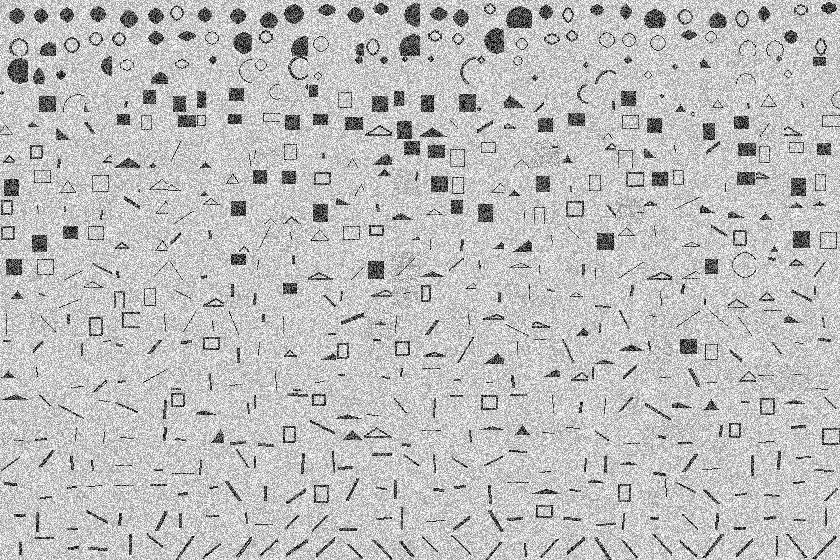

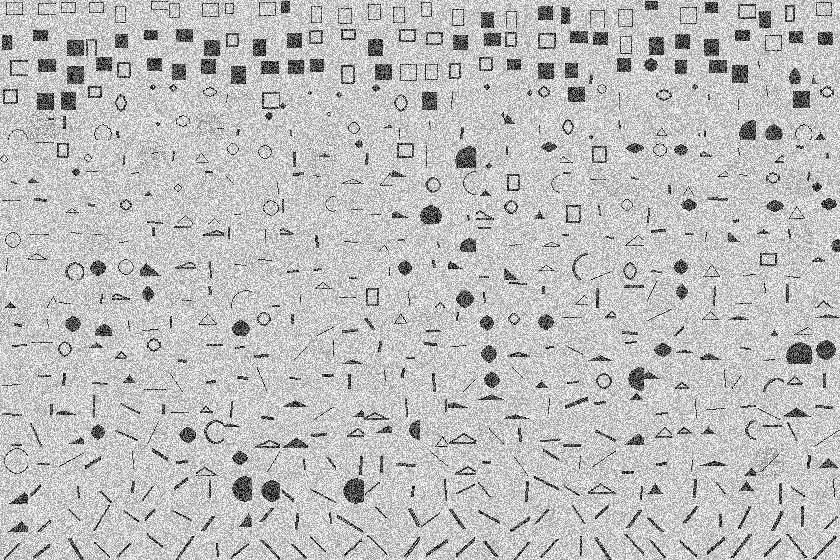

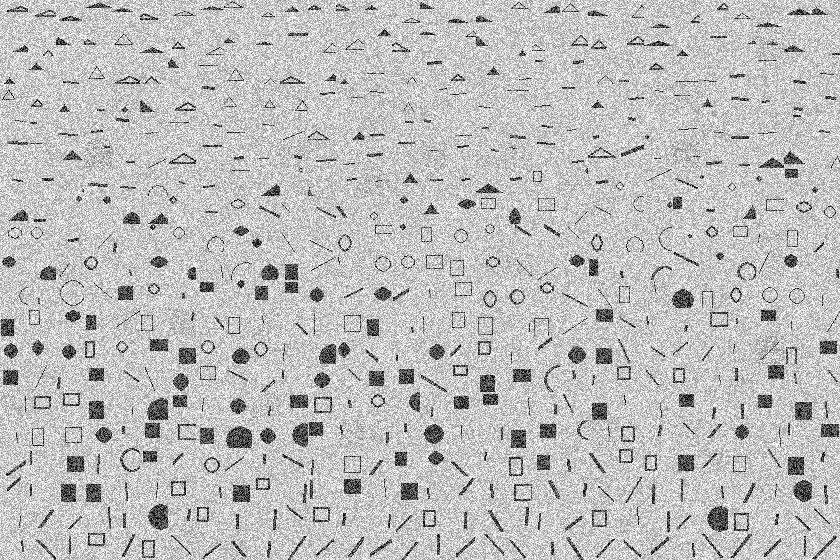

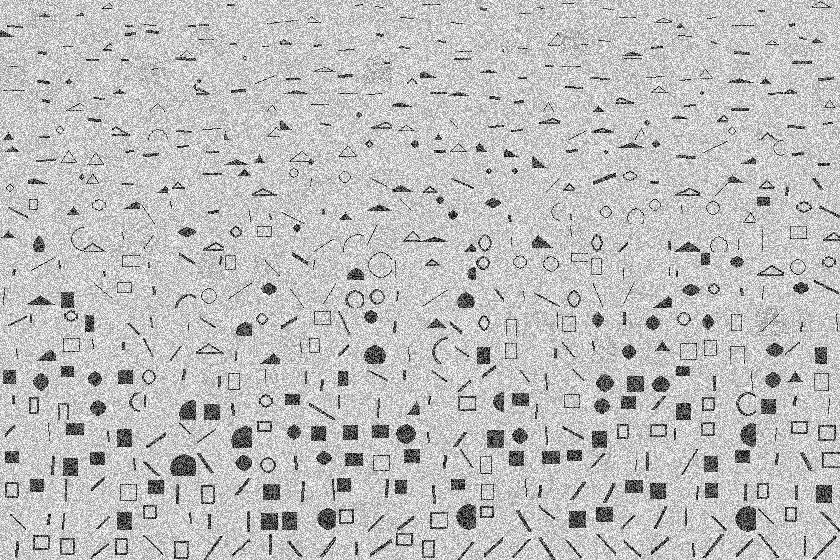

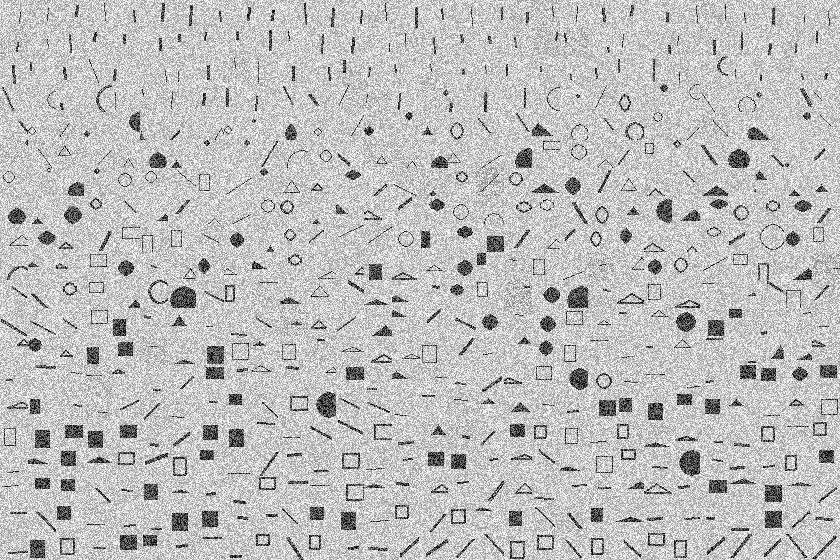

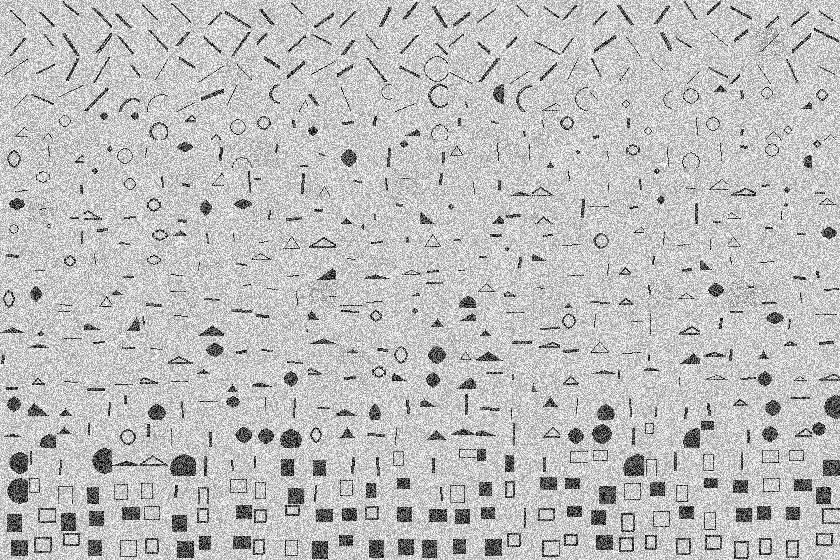

In [23]:
getCompareImages("circle", ordered_circle_dist)
getCompareImages("square", ordered_square_dist)
getCompareImages("triangle", ordered_triangle_dist)
getCompareImages("horizontal", ordered_hor_dist)
getCompareImages("vertical", ordered_ver_dist)
getCompareImages("diagonal", ordered_dia_dist)

In [29]:
def getCountTop(total, ordered_shape_dist, shape):
    count = [0, 0, 0, 0, 0, 0]
    for i in range(0, total):
        for j in range(0, len(shape)):
            if(total_filename[ordered_shape_dist[i]].find(shape[j]) != -1):
                count[j] = count[j] + 1
                break
    return count

In [49]:
topNumber = 100
shape_distribution = []
shape_distribution.append(getCountTop(topNumber, ordered_circle_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_square_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_triangle_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_hor_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_ver_dist, label))
shape_distribution.append(getCountTop(topNumber, ordered_dia_dist, label))


for i in range(0, len(label)):
    print(label[i], "distribution :", shape_distribution[i])
    for j in range(len(shape_distribution)):
        print("\t", label[j], shape_distribution[i][j]/topNumber*100, "%")
    print()

circle distribution : [91, 6, 2, 0, 1, 0]
	 circle 91.0 %
	 square 6.0 %
	 triangle 2.0 %
	 horizontal 0.0 %
	 vertical 1.0 %
	 diagonal 0.0 %

square distribution : [6, 90, 1, 0, 3, 0]
	 circle 6.0 %
	 square 90.0 %
	 triangle 1.0 %
	 horizontal 0.0 %
	 vertical 3.0 %
	 diagonal 0.0 %

triangle distribution : [1, 0, 80, 19, 0, 0]
	 circle 1.0 %
	 square 0.0 %
	 triangle 80.0 %
	 horizontal 19.0 %
	 vertical 0.0 %
	 diagonal 0.0 %

horizontal distribution : [5, 0, 27, 67, 0, 1]
	 circle 5.0 %
	 square 0.0 %
	 triangle 27.0 %
	 horizontal 67.0 %
	 vertical 0.0 %
	 diagonal 1.0 %

vertical distribution : [3, 0, 0, 0, 95, 2]
	 circle 3.0 %
	 square 0.0 %
	 triangle 0.0 %
	 horizontal 0.0 %
	 vertical 95.0 %
	 diagonal 2.0 %

diagonal distribution : [4, 0, 0, 0, 0, 96]
	 circle 4.0 %
	 square 0.0 %
	 triangle 0.0 %
	 horizontal 0.0 %
	 vertical 0.0 %
	 diagonal 96.0 %

